In [1]:
import keras
keras.__version__

'2.8.0'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now let's try to replace it with this smaller network:

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 56ms/step - loss: 0.4505 - acc: 0.8183 - val_loss: 0.3384 - val_acc: 0.8776
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2604 - acc: 0.9080 - val_loss: 0.2848 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1992 - acc: 0.9300 - val_loss: 0.2817 - val_acc: 0.8872
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1677 - acc: 0.9412 - val_loss: 0.2962 - val_acc: 0.8826
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1422 - acc: 0.9481 - val_loss: 0.3108 - val_acc: 0.8809
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1239 - acc: 0.9586 - val_loss: 0.3399 - val_acc: 0.8737
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1094 - acc: 0.9624 - val_loss: 0.3564 - val_acc: 0.8734
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0949 - a

In [6]:
original_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [8]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1]


After applying dropout, this vector will have a few zero entries
distributed at random: 
for example, [0, 0.5, 1.3, 0, 1.1].

In [9]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 55ms/step - loss: 0.6421 - acc: 0.6591 - val_loss: 0.5837 - val_acc: 0.7548
Epoch 2/20
49/49 [==============================] - 2s 51ms/step - loss: 0.5539 - acc: 0.7984 - val_loss: 0.5061 - val_acc: 0.8497
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.4906 - acc: 0.8463 - val_loss: 0.4543 - val_acc: 0.8767
Epoch 4/20
49/49 [==============================] - 3s 59ms/step - loss: 0.4419 - acc: 0.8747 - val_loss: 0.4175 - val_acc: 0.8776
Epoch 5/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3983 - acc: 0.8904 - val_loss: 0.3839 - val_acc: 0.8780
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3535 - acc: 0.8912 - val_loss: 0.3531 - val_acc: 0.8808
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3194 - acc: 0.9018 - val_loss: 0.3376 - val_acc: 0.8806
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2846 - a

In [10]:
dpt_model_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [11]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
dpt_model_val_loss = dpt_model_hist.history['val_loss']

Let's plot the results:

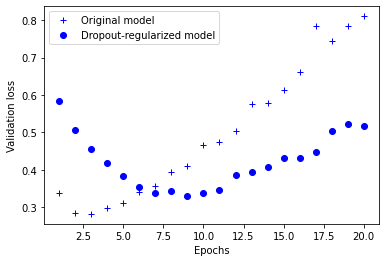

In [12]:

import matplotlib.pyplot as plt
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#The universal workflow of neural network learning
1. Defining the problem and assembling a dataset
2. Choosing a measure of success
3. Deciding on an evaluation protocol
4. Preparing your data
5. Developing a model that does better than a baseline
6. Scaling up: developing a model that overfits
7. Regularizing your model and tuning your hyperparameters

